# Running bash commands from your notebook

First, let's install all the dependencies.

You can directly run bash commands in your notebook, by either prefixing your commands with an exclamation mark `!`:
```ipython
[1] !echo "this is a bash command"
this is a bash command

[2] !ls
/home/user/git_repos/FNO_workshop
```

or by starting your cell with the `%%bash` ipython magic.

Let's see a simple example:

In [1]:
%%bash

for var in hello world
do
  echo ${var}
done

hello
world


# Installing the dependencies

Now, let's install the dependencies.

In [2]:
!pip install neuraloperator
!pip install tensorly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 97.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta

In [3]:
!pip install gpustat
!pip install gdown
!pip install opt-einsum
!pip install h5py wandb ruamel.yaml zarr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1.1-py3-none-any.whl size=26666 sha256=7d6c4f3ce4274239a0a0855bd132df31d360aad01ca8c5073ae781380ab74fe2
  Stored in directory: /root/.cache/pip/wheels/c9/2b/d9/a0b77d6e8623ce6b5c73813af455a3ace394abfc2e8aef7ed6
Successfully built gpustat


# Prepare data

In [4]:
import requests
import tarfile
import os

# Target directory for all extracted content
output_dir = "darcy"
os.makedirs(output_dir, exist_ok=True)

# List of files to download
files = [
    {
        "url": "https://zenodo.org/records/12784353/files/darcy_32.tgz?download=1",
        "filename": "darcy_32.tgz"
    },
    {
        "url": "https://zenodo.org/records/12784353/files/darcy_64.tgz?download=1",
        "filename": "darcy_64.tgz"
    }
]

for file in files:
    url = file["url"]
    filename = file["filename"]

    # Download file
    print(f"Downloading {filename}...")
    response = requests.get(url, stream=True)
    with open(filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"{filename} downloaded.")

    # Extract into the shared directory
    print(f"Extracting {filename} to {output_dir}...")
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall(path=output_dir)
    print(f"{filename} extracted.")

    # Clean up
    os.remove(filename)
    print(f"{filename} removed.\n")

print("All files downloaded and extracted to:", output_dir)


darcy_32.tgz downloaded.
Extracting darcy_32.tgz to darcy...
darcy_32.tgz extracted.
darcy_32.tgz removed.

darcy_64.tgz downloaded.
Extracting darcy_64.tgz to darcy...
darcy_64.tgz extracted.
darcy_64.tgz removed.

All files downloaded and extracted to: darcy


# Check the dependencies

In [5]:
import tensorly as tl
import neuralop as no

print(f'{tl.__version__=}')
print(f'{no.__version__=}')

tl.__version__='0.9.0'
no.__version__='1.0.2'


# FFT and Spectral Convolution


In [6]:
from neuralop.layers.spectral_convolution import SpectralConv
from neuralop.models import FNO2d
import torch

In [7]:
fourier_conv = SpectralConv(in_channels=3, out_channels=10, n_modes=(12, 12),
                                      factorization=None, implementation='reconstructed')

In [8]:
in_data = torch.randn((2, 3, 32, 32))

In [9]:
out = fourier_conv(in_data)

In [10]:
out.shape

torch.Size([2, 10, 32, 32])

In [11]:
fourier_conv

SpectralConv(
  (weight): DenseTensor(shape=torch.Size([3, 10, 12, 7]), rank=None)
)

The way the spectral convolution works is that it multiplies (complex) coefficients with (complex) weights, learned end-to-end.

# Tensorized Spectral Convolutions

It is possible to express the weights of one or more layers as in factorized form, as a low-rank decomposition of the full weights.

`neuralop` comes with support for tensorization out of the box, you can simply specify, e.g., to use a Tucker factorization, `factorization='tucker'`.

In [12]:
fourier_conv = SpectralConv(in_channels=3, out_channels=10, n_modes=(12, 12),
                                      factorization='tucker', implementation='reconstructed')

In [13]:
fourier_conv

SpectralConv(
  (weight): TuckerTensor(shape=(3, 10, 12, 7), rank=(2, 8, 10, 6))
)

## Efficient forward pass

When factorizing the weights, have two main options during the forward pass:
1. reconstruct the full weights and use that for the forward pass
2. contract the input directly with the factorized weights to predict the output

When the factorized weights are small, the second option can lead to large speedups or memory reduction, particularly when coupled with checkpointing.

In `neuralop`, you can use those simply by specifying `implementation='reconstructed'` or `implementation='factorized'`:

In [14]:
fourier_conv = SpectralConv(in_channels=3, out_channels=10, n_modes=(12, 12),
                                      factorization='tucker', implementation='factorized')

# Full Tensorized Fourier Neural Operator

The full architecture is composed of

i) a lifting layer taking the number of input channels and lifting that to the desired number of hidden channels
ii) a number of spectral convolutions, as shown above
iii) a projection layer projecting back from the number of hidden channels to the desired number of output channels


In [15]:
fno = FNO2d(n_modes_height=16, n_modes_width=16, hidden_channels=16,
              factorization=None, skip='linear')

In [16]:
fno

FNO2d(
  (positional_embedding): GridEmbeddingND()
  (fno_blocks): FNOBlocks(
    (convs): ModuleList(
      (0-3): 4 x SpectralConv(
        (weight): DenseTensor(shape=torch.Size([16, 16, 16, 9]), rank=None)
      )
    )
    (fno_skips): ModuleList(
      (0-3): 4 x Flattened1dConv(
        (conv): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
      )
    )
    (channel_mlp): ModuleList(
      (0-3): 4 x ChannelMLP(
        (fcs): ModuleList(
          (0): Conv1d(16, 8, kernel_size=(1,), stride=(1,))
          (1): Conv1d(8, 16, kernel_size=(1,), stride=(1,))
        )
      )
    )
    (channel_mlp_skips): ModuleList(
      (0-3): 4 x SoftGating()
    )
  )
  (lifting): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(5, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(32, 16, kernel_size=(1,), stride=(1,))
    )
  )
  (projection): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(32, 1, kernel_size=(

## Lifting layer

Increasing the number of channels

In [17]:
fno.lifting

ChannelMLP(
  (fcs): ModuleList(
    (0): Conv1d(5, 32, kernel_size=(1,), stride=(1,))
    (1): Conv1d(32, 16, kernel_size=(1,), stride=(1,))
  )
)

## Spectral convolutions

In [18]:
fno.fno_blocks.convs

ModuleList(
  (0-3): 4 x SpectralConv(
    (weight): DenseTensor(shape=torch.Size([16, 16, 16, 9]), rank=None)
  )
)

## Skip connections: recovering non-periodicity

Recall the FNO architecture has skip connections: the FFT transformation will loose non-periodic information that has to be reinjected through skip connections. These skip connections also help with learning.

![FNO_layer](./images/fourier_layer.png)

Here, linear layer (represented by weight W in the image). We can also use Identity skip (`skip='identity'`) or soft-gated connections (`skip='soft-gating'`)

In [19]:
fno.fno_blocks.fno_skips

ModuleList(
  (0-3): 4 x Flattened1dConv(
    (conv): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
  )
)

## Projection: going back to the target number of channels

Finally, the projection layer takes the hidden dimension to projection_channels and to the actual number of output channels (here, 1)

In [20]:
fno.projection

ChannelMLP(
  (fcs): ModuleList(
    (0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
    (1): Conv1d(32, 1, kernel_size=(1,), stride=(1,))
  )
)

In [21]:
from pathlib import Path
from neuralop.data.datasets.darcy import load_darcy_pt

# Load the data

In [22]:
!ls darcy/
data_path="darcy/"

darcy_test_32.pt  darcy_test_64.pt  darcy_train_32.pt  darcy_train_64.pt


In [23]:
train_loader, test_loaders, output_encoder = load_darcy_pt(data_root=data_path, n_train=100, n_tests=[10],
              batch_size=3, test_batch_sizes=[3],
              test_resolutions=[32], train_resolution=32)

Loading test db for resolution 32 with 10 samples 


# Visualizing the data  

The data is stored in a dictionary

In [24]:
train_dataset = train_loader.dataset

data = train_dataset[0]
x = data['x']
y = data['y']

In [25]:
x.shape

torch.Size([1, 32, 32])

`x` is of shape (3, height, width).

This is because, in addition to the binary input, we appended a positional encoding, so the model knows the location of each pixel.

Let's check the actual data:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

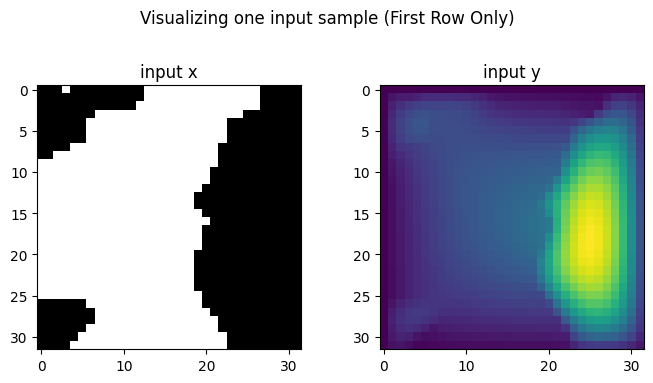

In [27]:
# Which sample to view
index = 10

data = train_dataset[index]
x = data['x']
y = data['y']

fig = plt.figure(figsize=(7, 3.5))  # Adjust height to half
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[0], cmap='gray')
ax.set_title('input x')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(y.squeeze())
ax.set_title('input y')

fig.suptitle('Visualizing one input sample (First Row Only)', y=1.05)
plt.tight_layout()
plt.show()


In [28]:
import torch
import wandb
import sys
from neuralop import get_model
from neuralop import Trainer
from neuralop.training import setup
from neuralop import LpLoss, H1Loss

## Setup

Here we just setup pytorch and print the configuration

# Loading the data

We train in one resolution and test in several resolutions to show the zero-shot super-resolution capabilities of neural-operators.

In [29]:
# Loading the Darcy flow training set in 32x32 resolution, test set in 32x32 and 64x64 resolutions
train_loader, test_loaders, output_encoder = load_darcy_pt(
    data_root="darcy/",
    train_resolution=32,
    n_train=1000,
    batch_size=32,
    test_resolutions=[32, 64],
    n_tests=[100, 100],
    test_batch_sizes=[32, 32],
)


Loading test db for resolution 32 with 100 samples 
Loading test db for resolution 64 with 100 samples 


# Creating the model and putting it on the GPU

In [30]:
model = FNO2d(in_channels=1, out_channels=1, n_modes_height=12, n_modes_width=12, hidden_channels=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Create the optimizer and learning rate scheduler

Here, we use an Adam optimizer and a learning rate schedule depending on the configuration

In [31]:
#Create the optimizer
optimizer = torch.optim.Adam(model.parameters(),
                                lr=1e-3,
                                weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=1000)


# Creating the loss

We will optimize the Sobolev norm but also evaluate our goal: the l2 relative error

In [32]:
# Creating the losses
l2loss = LpLoss(d=2, p=2)
h1loss = H1Loss(d=2)
train_loss = l2loss

eval_losses={'h1': h1loss, 'l2': l2loss}

In [33]:
print('\n### MODEL ###\n', model)
print('\n### OPTIMIZER ###\n', optimizer)
print('\n### SCHEDULER ###\n', scheduler)
print('\n### LOSSES ###')
print(f'\n * Train: {train_loss}')
print(f'\n * Test: {eval_losses}')
print(f'\n### Beginning Training...\n')



### MODEL ###
 FNO2d(
  (positional_embedding): GridEmbeddingND()
  (fno_blocks): FNOBlocks(
    (convs): ModuleList(
      (0-3): 4 x SpectralConv(
        (weight): DenseTensor(shape=torch.Size([32, 32, 12, 7]), rank=None)
      )
    )
    (fno_skips): ModuleList(
      (0-3): 4 x Flattened1dConv(
        (conv): Conv1d(32, 32, kernel_size=(1,), stride=(1,), bias=False)
      )
    )
    (channel_mlp): ModuleList(
      (0-3): 4 x ChannelMLP(
        (fcs): ModuleList(
          (0): Conv1d(32, 16, kernel_size=(1,), stride=(1,))
          (1): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        )
      )
    )
    (channel_mlp_skips): ModuleList(
      (0-3): 4 x SoftGating()
    )
  )
  (lifting): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
      (1): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    )
  )
  (projection): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
      (1): Conv1d(64

# Creating the trainer

In [34]:
trainer = Trainer(model=model, n_epochs=10, device=device)

# Training the model

In [35]:
trainer.train(train_loader,
              test_loaders,
              optimizer,
              scheduler,
              training_loss=train_loss,
              eval_losses=eval_losses)

{'train_err': 4.016379587352276,
 'avg_loss': 0.12852414679527283,
 'avg_lasso_loss': None,
 'epoch_train_time': 0.4435376469999994,
 '32_h1': tensor(0.2728, device='cuda:0'),
 '32_l2': tensor(0.1398, device='cuda:0'),
 '64_h1': tensor(0.3589, device='cuda:0'),
 '64_l2': tensor(0.1497, device='cuda:0')}

In [36]:
trainer = Trainer(model=model, n_epochs=100, device=device)
trainer.train(train_loader,
              test_loaders,
              optimizer,
              scheduler,
              training_loss=train_loss,
              eval_losses=eval_losses)

{'train_err': 1.172747127711773,
 'avg_loss': 0.03752790808677673,
 'avg_lasso_loss': None,
 'epoch_train_time': 0.4511575999999877,
 '32_h1': tensor(0.1676, device='cuda:0'),
 '32_l2': tensor(0.0675, device='cuda:0'),
 '64_h1': tensor(0.2581, device='cuda:0'),
 '64_l2': tensor(0.0759, device='cuda:0')}

# Follow-up questions

You can now play with the configuration and see how the performance is impacted.

Which parameters do you think will most influence performance?
Learning rate? Learning schedule? hidden_channels? Number of training samples?

Does your intuition match the results you are getting?